1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import pylab as py
import pdb
import random
import decimal
import matplotlib.pyplot as plt 
from scipy import optimize as opt
from scipy.interpolate import interp1d
from scipy import fftpack, ndimage
from matplotlib.colors import LogNorm

Storm wind speed occurring every 50 years: 32.97989844019468


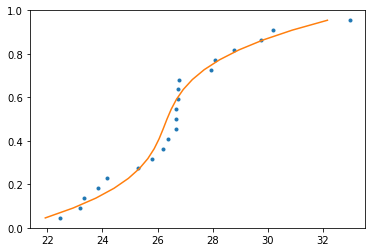

In [2]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

lin = np.linspace(1,21,21)

year_p = np.full((1,21),(1/(years_nb+1)))
year_cum = np.cumsum(year_p)

sort_speed = np.sort(max_speeds)

quantile_func = sp.interpolate.UnivariateSpline(year_cum,sort_speed)
plt.plot(sort_speed,year_cum, '.')
plt.plot(quantile_func(year_cum),year_cum)

fifty_prob = 1 - 0.02
fifty_wind = quantile_func(fifty_prob)
print("Storm wind speed occurring every 50 years:", fifty_wind)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

MAX TEMPERATURE: 

Manual tuning of params: 21 7 8 18 
Fitted parameters:  [23.09208034  6.73581602 10.52885544 15.77932993]

MIN TEMPERATURE: 

Manual tuning of params: 50 7.2 8.7 -60 
Fitted parameters:  [ 52.64929131   7.16452607   7.8083613  -61.32093418]


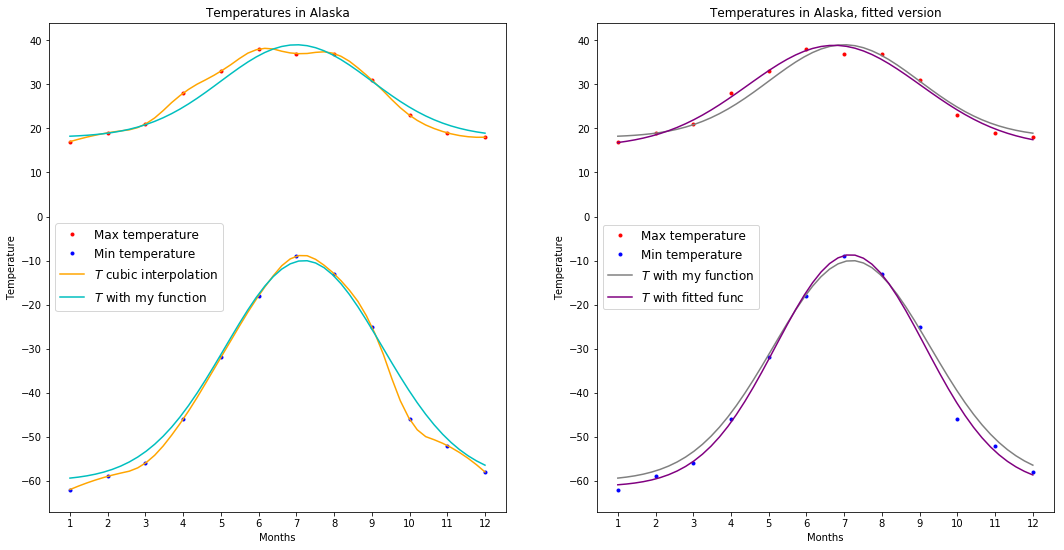

In [3]:
max_tmp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_tmp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.linspace(1,12,12)

fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(1, 2, 1)
plt.title('Temperatures in Alaska')
plt.plot(months,max_tmp,'.',label='Max temperature',color='red')
plt.xlabel("Months")
plt.ylabel("Max Temperature")

plt.plot(months,min_tmp,'.',label='Min temperature',color='blue')
plt.xlabel("Months")
plt.xticks(np.arange(1,13,1))
plt.yticks(np.arange(-60,50,10))
plt.ylabel("Temperature")

cubic_interp_max = interp1d(months, max_tmp, kind='quadratic')
cubic_interp_min = interp1d(months, min_tmp, kind='quadratic')

interpolation_time = np.linspace(1, 12, 50)

cubic_results_max = cubic_interp_max(interpolation_time)
plt.plot(interpolation_time, cubic_results_max, color='orange')
cubic_results_min = cubic_interp_min(interpolation_time)
plt.plot(interpolation_time, cubic_results_min, color='orange', label='$T$ cubic interpolation')
plt.legend()

def func(x, a,b,c,d):
    return a*np.exp(-((x-b)**2)/c)+d

a,b,c,d = 21,7,8,18
plt.plot(interpolation_time, func(interpolation_time,a,b,c,d),c='c')
e,f,g,h = 50,7.2,8.7,-60
plt.plot(interpolation_time, func(interpolation_time,e,f,g,h),c='c' ,label='$T$ with my function')
plt.legend(fontsize='12')

prm, prm_cov = opt.curve_fit(func,months,max_tmp,p0=[21,7,8,18])
print("MAX TEMPERATURE: \n")
print("Manual tuning of params:",a,b,c,d,"\nFitted parameters: ", prm)
prm2, prm_cov2 = opt.curve_fit(func,months,min_tmp,p0=[50,7.2,8.7,-60])
print("\nMIN TEMPERATURE: \n")
print("Manual tuning of params:",e,f,g,h,"\nFitted parameters: ", prm2)

ax2 = fig.add_subplot(1, 2, 2)

plt.title('Temperatures in Alaska, fitted version')
plt.plot(months,max_tmp,'.',label='Max temperature',color='red')
plt.xlabel("Months")
plt.ylabel("Max Temperature")

plt.plot(months,min_tmp,'.',label='Min temperature',color='blue')
plt.xlabel("Months")
plt.xticks(np.arange(1,13,1))
plt.yticks(np.arange(-60,50,10))
plt.ylabel("Temperature")

a,b,c,d = 21,7,8,18
plt.plot(interpolation_time, func(interpolation_time,a,b,c,d),c='grey')
e,f,g,h = 50,7.2,8.7,-60
plt.plot(interpolation_time, func(interpolation_time,e,f,g,h),c='grey' ,label='$T$ with my function')
plt.legend(fontsize='12')

a,b,c,d = prm[0],prm[1],prm[2],prm[3]
plt.plot(interpolation_time, func(interpolation_time,a,b,c,d),color='purple')
e,f,g,h = prm2[0],prm2[1],prm2[2],prm2[3]
plt.plot(interpolation_time, func(interpolation_time,e,f,g,h),color='purple' ,label='$T$ with fitted func')
plt.legend(fontsize='12')
plt.show()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?



 These are all the local minima of the function: 
 [[-0.0898, 0.71], [-1.7036, 0.8], [0.0898, -0.71], [-1.6071, -0.57], [1.6071, 0.57], [1.7036, -0.8]]


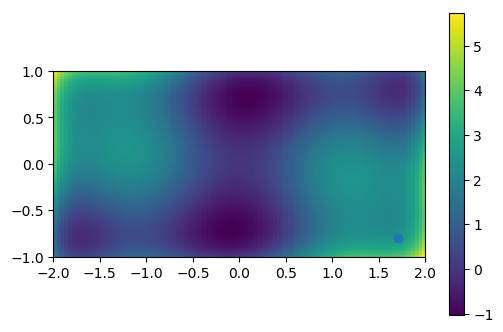

The global minima of the function are (0.0898, -0.71) and (-0.0898, 0.71): 

The value of the function in the global minima is: -1.031628445373099

This is what happens with a initial guess equal to (0,0):

 final_simplex: (array([[-0.08985145,  0.71266538],
       [-0.08980805,  0.71267176],
       [-0.08977995,  0.71263089]]), array([-1.03162845, -1.03162845, -1.03162843]))
           fun: -1.031628452567338
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 52
        status: 0
       success: True
             x: array([-0.08985145,  0.71266538])


In [4]:
x_values = np.linspace(-2,2,100)
y_values = np.linspace(-1,1,100)

def f(x):
    return ((4-2.1*(x[0]**2)+(x[0]**4/3))*(x[0]**2)+(x[0]*x[1])+(4*(x[1]**2)-4)*(x[1]**2))

xx, yy = np.meshgrid(x_values, y_values)

res = f([xx,yy])
plt.figure(dpi=100)
plt.imshow(res, extent=[-2, 2, -1, 1])
plt.colorbar()

grid_x = []

# Generate random number for intial point 
for i in range(1000):
    a = random.uniform(-2.0, 2-0)
    b = random.uniform(-2.0, 2-0)
    if a>=b:
        grid_x.append([b,a])
    else:
        grid_x.append([a,b])

min_ = []

# Find the local minima from a random starting point
for elm in grid_x:
    m = opt.minimize(f, elm)
    a0 = m.x[0]
    b0 = m.x[1]
    min_.append([float(round(a0,4)),float(round(b0,2))])
    
unique_x = []

for elm in min_:
    if elm not in unique_x:
        unique_x.append(elm)
print("\n These are all the local minima of the function: \n", unique_x)

plt.scatter(m.x[0], m.x[1])
plt.show()

print("The global minima of the function are (0.0898, -0.71) and (-0.0898, 0.71): \n")

guess=np.array([0, -0.85])
res1=opt.minimize(f,guess,method='Nelder-Mead')
#print(res1)
print("The value of the function in the global minima is:",res1['fun'])
print("\nThis is what happens with a initial guess equal to (0,0):\n")
guess=np.array([0,0])
res2=opt.minimize(f,guess,method='Nelder-Mead')
print(res2)

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

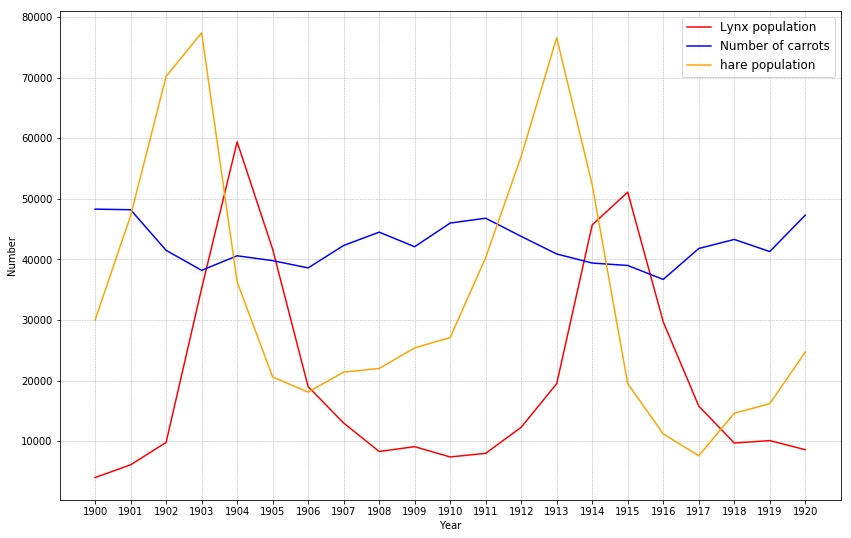

max: 48300.0
mean: 42400.0
standard deviation: 3322.5062255844787
Frequency peak of carrots: 0.09523809523809523


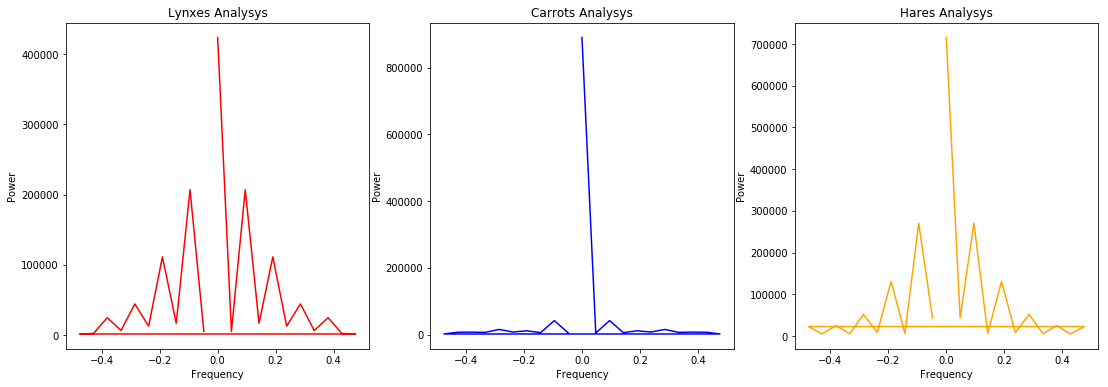

In [5]:
file = open('populations.txt', 'r') 

Data = np.loadtxt("populations.txt", skiprows=1)

year_data = Data[:,0]
year_hare = Data[:,1]
year_lynx = Data[:,2]
year_carrot = Data[:,3]

fig = plt.figure(figsize=(14, 9))
plt.plot(year_data, year_lynx, color='r',label="Lynx population")
plt.plot(year_data, year_carrot,color='b',label="Number of carrots")
plt.plot(year_data, year_hare,color='orange',label="hare population")
plt.legend(fontsize='12')
plt.xlabel("Year")
plt.ylabel("Number")
plt.xticks(np.arange(1900,1921,1))
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

print ("max:", np.max(year_carrot))
print ("mean:", np.mean(year_carrot))
print ("standard deviation:", np.std(year_carrot))

fig = plt.figure(figsize=(18.5, 6))
#Lynxes
lynfft = fftpack.fft(year_lynx)
lyn_pow = np.abs(lynfft)
lyn_sample_freq = fftpack.fftfreq(year_lynx.size)

ax1 = fig.add_subplot(1, 3, 1)
ax1 = plt.plot(lyn_sample_freq, lyn_pow, c='r')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lynxes Analysys')

#Carrots
carfft = fftpack.fft(year_carrot)
car_pow = np.abs(carfft)
car_sample_freq = fftpack.fftfreq(year_carrot.size)

ax2 = fig.add_subplot(1, 3, 2)
ax2 = plt.plot(car_sample_freq, car_pow, c='b')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Carrots Analysys')

#Hares
harfft = fftpack.fft(year_hare)
har_pow = np.abs(harfft)
har_sample_freq = fftpack.fftfreq(year_hare.size)

ax2 = fig.add_subplot(1, 3, 3)
ax2 = plt.plot(har_sample_freq, har_pow, c='orange')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Hares Analysys')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(har_pow > 0)
freqs = har_sample_freq[pos_mask]
peak_freq = freqs[har_pow[pos_mask].argmax()]

print("Frequency peak of carrots:",lyn_sample_freq[2])

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


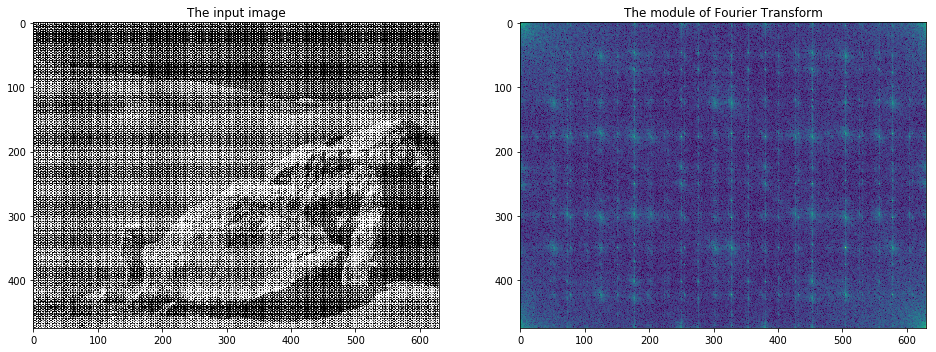

In [16]:
# Read the input image 
img = plt.imread('moonlanding.png')

fig, axs = plt.subplots(1, 2, figsize=(16,10))

axs[0].imshow(img,plt.cm.gray)
axs[0].set_title('The input image')

# Compute the Fourier transform and the associated module
spectrum_image = fftpack.fft2(img)
spectrum_abs = np.abs(spectrum_image)

axs[1].imshow(spectrum_abs, norm=LogNorm(vmin=5))
axs[1].set_title("The module of Fourier Transform")

plt.show()

In the second plot, when we find brighter points, those points indicates the noise. The noise is contained in the high-frequency part of the spectrum

/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


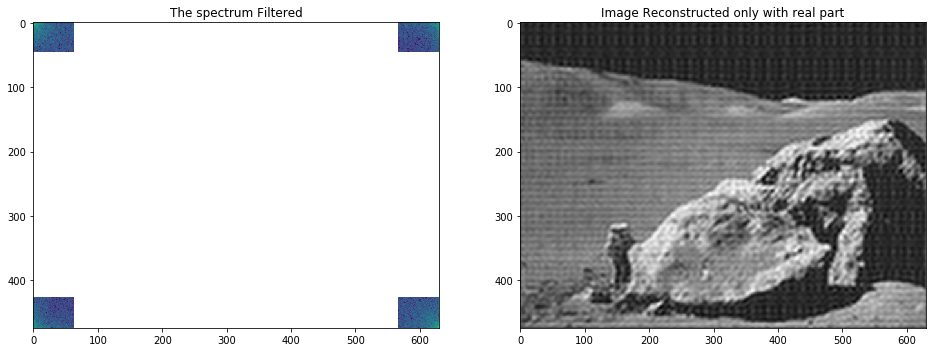

In [17]:
k = 0.1 # The best value

fig, axs = plt.subplots(1, 2, figsize=(16,10))

spectrum_image = spectrum_image.copy() 
x, y = spectrum_image.shape 


spectrum_image[int(x*k):int(x*(1-k))] = 0 
spectrum_image[:, int(y*k):int(y*(1-k))] = 0 

spectrum_abs = np.abs(spectrum_image)

axs[0].imshow(spectrum_abs, norm=LogNorm(vmin=5)) 
axs[0].set_title('The spectrum Filtered')

im_new = fftpack.ifft2(spectrum_image).real 
axs[1].imshow(im_new, plt.cm.gray)
axs[1].set_title('Image Reconstructed only with real part')

plt.show()